In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd gdrive/MyDrive/thesis - Copy
!ls

/content/gdrive/MyDrive/thesis - Copy
 application  'flip img test.ipynb'   main.py	  run_rnn_experiments.sh   utils
 cells	       get-pip.py	      models	  setup.py		   venv
 cpts	       hippornn_test.py       notebooks   terminal.ipynb	   yolov4.egg-info
 data	       __init__.py	      README.md   thesis		   yolov4_test.ipynb
 figures       loss		      results	  train


### Ensure that Virtualenv is installed and up to date

In [3]:
!pip install --upgrade virtualenv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 26.7 MB/s eta 0:00:00


### Create Virtual Env

In [4]:
!virtualenv -p python3 venv

created virtual environment CPython3.10.12.final.0-64 in 22425ms
  creator CPython3Posix(dest=/content/gdrive/MyDrive/thesis - Copy/venv, clear=False, no_vcs_ignore=False, global=False)
  seeder FromAppData(download=False, pip=bundle, setuptools=bundle, wheel=bundle, via=copy, app_data_dir=/root/.local/share/virtualenv)
    added seed packages: pip==23.3.1, setuptools==68.2.2, wheel==0.41.2
  activators BashActivator,CShellActivator,FishActivator,NushellActivator,PowerShellActivator,PythonActivator


### Activate Virtual Env

In [5]:
!source venv/bin/activate

Install package for relative imports

In [6]:
!pip install -e .

Obtaining file:///content/gdrive/MyDrive/thesis%20-%20Copy
  Preparing metadata (setup.py) ... done
  Running setup.py develop for yolov4


### Validate Rnns

In [ ]:
!python3 main.py --model_name gru --dataset_name smnist --hidden_size 16 --continue_training False

Could not find argument nlayers


### Validate Smms

In [ ]:
!python3 main.py --model_name gru --dataset_name mnist --N 16 --hidden_size 16 --continue_training False

GruRNN(
  (rnn_cell): GruCell(
    (i2h): Linear(in_features=1, out_features=48, bias=True)
    (h2h): Linear(in_features=16, out_features=48, bias=True)
  )
  (h2o): Linear(in_features=16, out_features=10, bias=True)
)
Run 1/5: Gru Rnn initalised with 16 number of hidden neurons.
Learning rate scheduler: Constant
Training parameters: 
 50 : epochs. 
 1 : input size. 
 16 : hidden size. 
 10 : output size. 
 1e-05 : learning rate. 
 0.0 : weight decay.
Traceback (most recent call last):
  File "/content/gdrive/MyDrive/thesis - Copy/main.py", line 50, in <module>
    train_model_with_args()
  File "/content/gdrive/MyDrive/thesis - Copy/main.py", line 48, in train_model_with_args
    initialize_with_args(arguments)
  File "/content/gdrive/MyDrive/thesis - Copy/train/train.py", line 192, in initialize_with_args
    main(arguments)
  File "/content/gdrive/MyDrive/thesis - Copy/train/train.py", line 627, in main
    train_loss_value, train_top1acc_value, train_top5acc_value = train(argument

In [13]:
!python3 main.py --lr 1e-3 --warmup_lr 1e-2 --nepochs 300 --model_name yolov4 --dataset_name mscoco --nclasses 80 --cosine_anneal True --save_model True --continue_training False

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_V2_S_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_V2_S_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Run 1/5: YoloV4 initalised with an EfficientNetV2 Backbone.
Learning rate scheduler: Cosine Annealing
Training parameters: 
 300 : epochs.  
 416 : image size. 
 0.0003 : learning rate. 
 0.0 : weight decay.
 0.6 : confidence threshold.  
 0.5 : MAP IoU threshold. 
 0.65 : NMS IoU threshold.
Learning rate: 0.0003
Train number bounding boxes:  predictions:0 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def whitesignal(period, dt, freq, rms=0.5, batch_shape=()):
    """
    Produces output signal of length period / dt, band-limited to frequency freq
    Output shape (*batch_shape, period/dt)
    Adapted from the nengo library
    """

    if freq is not None and freq < 1. / period:
        raise ValueError(f"Make ``{freq=} >= 1. / {period=}`` to produce a non-zero signal",)

    nyquist_cutoff = 0.5 / dt
    if freq > nyquist_cutoff:
        raise ValueError(f"{freq} must not exceed the Nyquist frequency for the given dt ({nyquist_cutoff:0.3f})")

    n_coefficients = int(np.ceil(period / dt / 2.))
    shape = batch_shape + (n_coefficients + 1,)
    sigma = rms * np.sqrt(0.5)
    coefficients = 1j * np.random.normal(0., sigma, size=shape)
    coefficients[..., -1] = 0.
    coefficients += np.random.normal(0., sigma, size=shape)
    coefficients[..., 0] = 0.

    set_to_zero = np.fft.rfftfreq(2 * n_coefficients, d=dt) > freq
    coefficients *= (1-set_to_zero)
    power_correction = np.sqrt(1. - np.sum(set_to_zero, dtype=float) / n_coefficients)
    if power_correction > 0.: coefficients /= power_correction
    coefficients *= np.sqrt(2 * n_coefficients)
    signal = np.fft.irfft(coefficients, axis=-1)
    signal = signal - signal[..., :1]  # Start from 0
    return signal

In [ ]:
vals = np.arange(0.0, 3, 1e-6)
np.random.seed(1)
u = whitesignal(3, 1e-6, 3.0, batch_shape=(1,))
print(u.shape)

(1, 3000000)


In [ ]:
def compute_ema(signal_array, alpha):
    ema = np.zeros_like(signal_array)
    ema[0][0] = signal_array[0][0]  # Set initial value of EMA as the first value in the signal

    for i in range(1, signal_array.shape[1]):
        ema[0][i] = alpha * signal_array[0][i] + (1 - alpha) * ema[0][i - 1]

    return ema

In [ ]:
eavg = compute_ema(u, 0.5)


In [ ]:
u[0]

array([[ 0.        ,  0.0026105 ,  0.00521654, ..., -0.00785564,
        -0.00523333, -0.0026147 ]])

In [ ]:
eavg[0]

array([ 0.        ,  0.00130525,  0.0032609 , ..., -0.01048421,
       -0.00785877, -0.00523674])

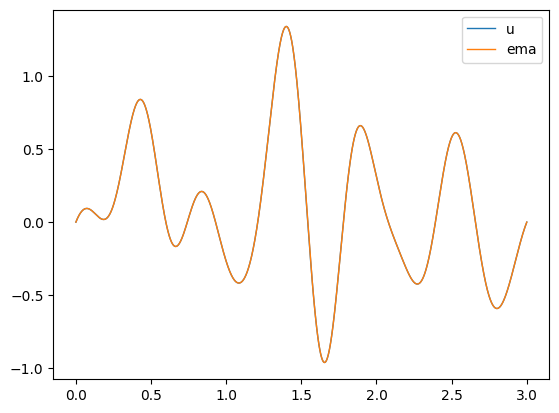

In [ ]:
#vals = np.arange(0.0, 3, 1e-3)
plt.plot(vals[-len(u[0]):], u[0], label='u', linewidth = 1,)
plt.plot(vals[-len(eavg[0]):], eavg[0], label='ema', linewidth = 1,)
plt.legend()

Yolo

In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models
from torch.nn.modules.upsampling import Upsample
import torch.nn.functional as F
from models.yolov4 import YoloV4_EfficentNet
from loss.yolov3loss import YoloV3Loss

### Torch modules

In [ ]:
class CnnBlock(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size = 3, padding = 0, stride = 1):
        super().__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size = kernel_size , stride= stride, padding = padding)
        self.bn = nn.BatchNorm2d(out_channels)
        self.relu = nn.LeakyReLU(0.1)

    def forward(self, x):
        out = self.conv(x)
        out = self.bn(out)
        out = self.relu(out)
        return out

class Upsample(nn.Module):
    def __init__(self, in_channels, out_channels, scale=2):
        super(Upsample, self).__init__()

        self.upsample = nn.Sequential(
            CnnBlock(in_channels = in_channels, out_channels = out_channels, kernel_size = 1),
            nn.Upsample(scale_factor = scale)
        )

    def forward(self, x):
        return self.upsample(x)

class Downsample(nn.Module):
    def __init__(self, in_channels, out_channels, scale=2):
        super(Downsample, self).__init__()

        self.downsample = CnnBlock(in_channels = in_channels, out_channels = out_channels, kernel_size = 3, stride = 2, padding = 1)

    def forward(self, x):
        return self.downsample(x)

class CnnBlockNoBnActiv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=1, padding=1)

    def forward(self, x):
        out = self.conv(x)
        return out

class ScaledPrediction(nn.Module):
    def __init__(self, channels, nclasses, padding = 1):
        super().__init__()
        self.nclasses = nclasses
        #self.cnn = CnnBlock(channels, (nclasses + 5) * 3, kernel_size = 1,  padding = 0)
        self.scaled_pred = nn.Sequential(
                            CnnBlock(channels, channels * 2, kernel_size = 3,  padding = 1),
                            CnnBlock(channels * 2, (nclasses + 5) * 3, kernel_size = 1,  padding = 0)
        )

    def forward(self, x):
        out = self.scaled_pred(x)
        # out = out.reshape(x.shape[0], 3, self.nclasses + 5, x.shape[2], x.shape[3]).permute(0, 1, 3, 4, 2)
        #print('ScaledPred.shape: ', out.shape)
        return out.reshape(x.shape[0], 3, self.nclasses + 5, x.shape[2], x.shape[3]).permute(0, 1, 3, 4, 2)

class SpatialPyramidPooling(nn.Module):
    def __init__(self):
        super().__init__()

        self.pyramid = nn.Sequential(
                                      nn.MaxPool2d(5, 1, 5 // 2),
                                      nn.MaxPool2d(9, 1, 9 // 2),
                                      nn.MaxPool2d(13, 1, 13 // 2)
                                      )
        #print(self.pyramid)

    def forward(self, x):
        features = [block(x) for block in self.pyramid]
        features = torch.cat([x] + features, dim=1)
        print('SSP out shape:', features.shape)
        return features


In [ ]:
class PathAggregationNet(nn.Module):
    def __init__(self):
        super().__init__()

        self.feature_transform3 = CnnBlock(in_channels = 64, out_channels = 128, kernel_size = 1)

        self.feature_transform4 = CnnBlock(in_channels = 160 , out_channels = 256, kernel_size = 1)

        self.resample5_4 = Upsample(in_channels = 512, out_channels = 256)
        self.resample4_3 = Upsample(in_channels = 256, out_channels = 128)
        self.resample3_4 = Downsample(in_channels = 128, out_channels = 256)
        self.resample4_5 = Downsample(in_channels = 256, out_channels = 512)

        self.downstream_conv5 = nn.Sequential(
            # 2048, 512
            CnnBlock(in_channels = 2048, out_channels = 512, kernel_size = 1),
            # 512, 1024
            CnnBlock(in_channels = 512, out_channels = 1024, kernel_size = 3,  padding = 1),
            # 1024, 512
            CnnBlock(in_channels = 1024, out_channels = 512, kernel_size = 1)
        )

        self.downstream_conv4 = nn.Sequential(
            CnnBlock(in_channels = 512, out_channels = 256, kernel_size = 1),
            CnnBlock(in_channels = 256, out_channels = 512, kernel_size = 3, padding = 1),
            CnnBlock(in_channels = 512, out_channels = 256, kernel_size = 1),
            CnnBlock(in_channels = 256, out_channels = 512, kernel_size = 3,  padding = 1),
            CnnBlock(in_channels = 512, out_channels = 256, kernel_size = 1),
        )
        self.downstream_conv3 = nn.Sequential(
            CnnBlock(in_channels = 256, out_channels = 128, kernel_size = 1),
            CnnBlock(in_channels = 128, out_channels = 256, kernel_size = 3,  padding = 1),
            CnnBlock(in_channels = 256, out_channels = 128, kernel_size = 1),
            CnnBlock(in_channels = 128, out_channels = 256, kernel_size = 3,  padding = 1),
            CnnBlock(in_channels = 256, out_channels = 128, kernel_size = 1),
        )

        self.upstream_conv4 = nn.Sequential(
            CnnBlock(in_channels = 512, out_channels = 256, kernel_size = 1),
            CnnBlock(in_channels = 256, out_channels = 512, kernel_size = 3,  padding = 1),
            CnnBlock(in_channels = 512, out_channels = 256, kernel_size = 1),
            CnnBlock(in_channels = 256, out_channels = 512, kernel_size = 3,  padding = 1),
            CnnBlock(in_channels = 512, out_channels = 256, kernel_size = 1),
        )
        self.upstream_conv5 = nn.Sequential(
            CnnBlock(in_channels = 1024, out_channels = 512, kernel_size = 1),
            CnnBlock(in_channels = 512, out_channels = 1024, kernel_size = 3,  padding = 1),
            CnnBlock(in_channels = 1024, out_channels = 512, kernel_size = 1),
            CnnBlock(in_channels = 512, out_channels = 1024, kernel_size = 3,  padding = 1),
            CnnBlock(in_channels = 1024, out_channels = 512, kernel_size = 1)
        )

    def forward(self, scale1, scale2, scale3):
        print("PanNet In 1 shape:", scale1.shape)
        print("PanNet In 2 shape:", scale2.shape)
        print("PanNet In 3 shape:", scale3.shape)
        #features = [self.feature_transform3(features[0]), self.feature_transform4(features[1]), features[2]]
        x1 = self.feature_transform3(scale1)
        x2 = self.feature_transform4(scale2)
        x3 = scale3

        downstream_feature5 = self.downstream_conv5(x3)
        route1 = torch.cat((x2, self.resample5_4(downstream_feature5)), dim = 1)
        downstream_feature4 = self.downstream_conv4(route1)
        route2 = torch.cat((x1, self.resample4_3(downstream_feature4)), dim = 1)
        downstream_feature3 = self.downstream_conv3(route2)

        route3 = torch.cat((self.resample3_4(downstream_feature3), downstream_feature4), dim = 1)
        upstream_feature4 = self.upstream_conv4(route3)
        route4 = torch.cat((self.resample4_5(upstream_feature4), downstream_feature5), dim = 1)
        upstream_feature5 = self.upstream_conv5(route4)

        return downstream_feature3, upstream_feature4, upstream_feature5


In [ ]:
# We try to stay true as close as possible to the darknet yolov3.cfg
# we however made changes and do not count [route], [shortcut] or
# [yolo] blocks as seperate layers in the network. These are generally
# not counted as seprate layers by the darknet framework either.
class YoloV4_EfficentNet(nn.Module):
      def __init__(self, nclasses = 20):
        super(YoloV4_EfficentNet, self).__init__()
        self.nclasses = nclasses

        self.efficientnetbackbone =  nn.Sequential(
              *list(models.efficientnet_v2_s(pretrained=True).children())[:-2]
              )

        self.yolov4coadaptation = nn.Sequential(
            CnnBlock(in_channels = 1280, out_channels = 512, kernel_size = 1, padding = 0), # L1 (done)
            CnnBlock(in_channels = 512, out_channels = 1024, kernel_size = 3, padding = 1), # L2 (done)
            CnnBlock(in_channels = 1024, out_channels = 512, kernel_size = 1, padding = 0), # L3 (done)
            )

        self.yolov4neck = nn.Sequential(
            SpatialPyramidPooling(),
            PathAggregationNet(),
            )



        self.yolov4head = nn.Sequential(
            ScaledPrediction(128, nclasses),
            ScaledPrediction(256, nclasses),
            ScaledPrediction(512, nclasses),
              )

      def forward(self, x):

          # the original yolov4 backbone Darknet53 CPS returns features maps at
          # different scales, which are then further processed by the SSP and
          # PaNet. Lastly the predictions are also made at 3 different scales.
          # We adjust the backbone to accomodate an efficentnet backbone. The
          # principle however stays the same.
          backbone_scale1 = self.efficientnetbackbone[0][:4](x)
          backbone_scale2 = self.efficientnetbackbone[0][4:6](backbone_scale1)
          # scale 3 is out of final passed onto following parts of the architecture
          backbone_scale3 = self.efficientnetbackbone[0][6:](backbone_scale2)

          x = self.yolov4coadaptation(backbone_scale3)
          ssp_out = self.yolov4neck[0](x)
          panet_scale1, panet_scale2, panet_scale3 = self.yolov4neck[1](backbone_scale1, backbone_scale2, ssp_out)
          print('PANET out features[0] shape:', panet_scale1.shape)
          print('PANET out features[1] shape:', panet_scale2.shape)
          print('PANET out features[2] shape:', panet_scale3.shape)
          sclaed_pred1 = self.yolov4head[0](panet_scale1)
          sclaed_pred2 = self.yolov4head[1](panet_scale2)
          sclaed_pred3 = self.yolov4head[2](panet_scale3)

          print('Scaled Pred1 out shape:', sclaed_pred1.shape)
          print('Scaled Pred2 out shape:', sclaed_pred2.shape)
          print('Scaled Pred1 out shape:', sclaed_pred3.shape)

          return sclaed_pred1, sclaed_pred2, sclaed_pred3


In [ ]:
if __name__ == "__main__":
    img_size = 416
    nclasses = 20
    model = YoloV4_EfficentNet(nclasses = nclasses)
    x = torch.randn((2, 3, img_size, img_size))
    out = model(x)
    #assert model(x)[0].shape == (2, 3, img_size//32, img_size//32, nclasses + 5)
    #assert model(x)[1].shape == (2, 3, img_size//16, img_size//16, nclasses + 5)
    #assert model(x)[2].shape == (2, 3, img_size//8, img_size//8, nclasses + 5)
    print("Success!")

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_V2_S_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_V2_S_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


SSP out shape: torch.Size([2, 2048, 13, 13])
PanNet In 1 shape: torch.Size([2, 64, 52, 52])
PanNet In 2 shape: torch.Size([2, 160, 26, 26])
PanNet In 3 shape: torch.Size([2, 2048, 13, 13])
PANET out features[0] shape: torch.Size([2, 128, 52, 52])
PANET out features[1] shape: torch.Size([2, 256, 26, 26])
PANET out features[2] shape: torch.Size([2, 512, 13, 13])
Scaled Pred1 out shape: torch.Size([2, 3, 52, 52, 25])
Scaled Pred2 out shape: torch.Size([2, 3, 26, 26, 25])
Scaled Pred1 out shape: torch.Size([2, 3, 13, 13, 25])
Success!


### Date Loader

In [ ]:
import config
import numpy as np
import os
import pandas as pd
import torch

from PIL import Image, ImageFile
from torch.utils.data import Dataset, DataLoader
from utils import (
    cells_to_bboxes,
    iou_width_height as iou,
    non_max_suppression as nms,
    plot_image
)

ImageFile.LOAD_TRUNCATED_IMAGES = True

class YOLODataset(Dataset):
    def __init__(
        self,
        csv_file,
        img_dir,
        label_dir,
        anchors,
        image_size=416,
        S=[13, 26, 52],
        C=20,
        transform=None,
    ):
        self.annotations = pd.read_csv(csv_file)
        self.img_dir = img_dir
        self.label_dir = label_dir
        self.image_size = image_size
        self.transform = transform
        self.S = S
        self.anchors = torch.tensor(anchors[0] + anchors[1] + anchors[2])  # for all 3 scales
        self.num_anchors = self.anchors.shape[0]
        self.num_anchors_per_scale = self.num_anchors // 3
        self.C = C
        self.ignore_iou_thresh = 0.5

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, index):
        label_path = os.path.join(self.label_dir, self.annotations.iloc[index, 1])
        bboxes = np.roll(np.loadtxt(fname=label_path, delimiter=" ", ndmin=2), 4, axis=1).tolist()
        img_path = os.path.join(self.img_dir, self.annotations.iloc[index, 0])
        image = np.array(Image.open(img_path).convert("RGB"))

        if self.transform:
            augmentations = self.transform(image=image, bboxes=bboxes)
            image = augmentations["image"]
            bboxes = augmentations["bboxes"]

        # Below assumes 3 scale predictions (as paper) and same num of anchors per scale
        targets = [torch.zeros((self.num_anchors // 3, S, S, 6)) for S in self.S]
        for box in bboxes:
            iou_anchors = iou(torch.tensor(box[2:4]), self.anchors)
            # order and select the first anchor which is the best anchor
            anchor_indices = iou_anchors.argsort(descending=True, dim=0)
            x, y, width, height, class_label = box
            has_anchor = [False, False, False] #* 3  # each scale should have one anchor

            for anchor_idx in anchor_indices:
                scale_idx = anchor_idx // self.num_anchors_per_scale
                anchor_on_scale = anchor_idx % self.num_anchors_per_scale
                S = self.S[scale_idx]
                i, j = int(S * y), int(S * x)  # which cell
                anchor_taken = targets[scale_idx][anchor_on_scale, i, j, 0]

                # check if the anchor has not already been
                if not anchor_taken and not has_anchor[scale_idx]:
                    targets[scale_idx][anchor_on_scale, i, j, 0] = 1
                    # extract the x and y on the cell
                    x_cell, y_cell = S * x - j, S * y - i  # both between [0,1]
                    # can be greater than 1 since it's relative to cell
                    width_cell, height_cell = (width * S, height * S,)

                    box_coordinates = torch.tensor([x_cell, y_cell, width_cell, height_cell])
                    targets[scale_idx][anchor_on_scale, i, j, 1:5] = box_coordinates
                    targets[scale_idx][anchor_on_scale, i, j, 5] = int(class_label)
                    has_anchor[scale_idx] = True

                # if the iou of a bounding box is greate rthan the ignored treshold
                # then we dont want to punish that anchor box
                elif not anchor_taken and iou_anchors[anchor_idx] > self.ignore_iou_thresh:
                    targets[scale_idx][anchor_on_scale, i, j, 0] = -1  # neg 1 means to ignore prediction

        return image, tuple(targets)


def test():
    anchors = config.ANCHORS

    transform = config.test_transforms

    dataset = YOLODataset(
        "COCO/train.csv",
        "COCO/images/images/",
        "COCO/labels/labels_new/",
        S=[13, 26, 52],
        anchors=anchors,
        transform=transform,
    )
    S = [13, 26, 52]
    scaled_anchors = torch.tensor(anchors) / (
        1 / torch.tensor(S).unsqueeze(1).unsqueeze(1).repeat(1, 3, 2)
    )
    loader = DataLoader(dataset=dataset, batch_size=1, shuffle=True)
    for x, y in loader:
        boxes = []

        for i in range(y[0].shape[1]):
            anchor = scaled_anchors[i]
            print(anchor.shape)
            print(y[i].shape)
            boxes += cells_to_bboxes(
                y[i], is_preds=False, S=y[i].shape[2], anchors=anchor
            )[0]
        boxes = nms(boxes, iou_threshold=1, threshold=0.7, box_format="midpoint")
        print(boxes)
        plot_image(x[0].permute(1, 2, 0).to("cpu"), boxes)


if __name__ == "__main__":
    test()

#### YoloV3

In [ ]:
class YoloV3_EfficentNet(nn.Module):
      def __init__(self, nclasses = 20):
        super(YoloV3_EfficentNet, self).__init__()

        self.efficientnetbackbone =  nn.Sequential(
              *list(models.efficientnet_v2_s(pretrained=True).children())[:-2]
              )

        self.yolov4neck = nn.Sequential(
                                        SpatialPyramidPooling(),
                                        PathAggregationNet()

        )

        self.yolov3head = nn.Sequential(

              # We try to stay true as close as possible to the darknet yolov3.cfg
              # we however made changes and do not count [route], [shortcut] or
              # [yolo] blocks as seperate layers in the network. These are generally
              # not counted as seprate layers by the darknet framework either.

              CnnBlock(in_channels = 1280, out_channels = 512, kernel_size = 1, padding = 0), # L1 (done)
              CnnBlock(in_channels = 512, out_channels = 1024, kernel_size = 3, padding = 1), # L2 (done)
              CnnBlock(in_channels = 1024, out_channels = 512, kernel_size = 1, padding = 0), # L3 (done)

              ## SSP
              SpatialPyramidPooling(),
              PathAggregationNet(),

              CnnBlock(in_channels = 512, out_channels = 1024, kernel_size = 3, padding = 1), # L4 (-4)
              CnnBlock(in_channels = 1024, out_channels = 512, kernel_size = 1, padding = 0), # L5 (61th in yolov3.cfg)
              CnnBlock(in_channels = 512, out_channels = 1024, kernel_size = 3, padding = 1), # L6

              # pred at first scale 1
              ScaledPrediction(1024, nclasses),                                               # L7

              # Route1: Concat output of L8 with out of L4 (Layer -4 before)
              CnnBlock(in_channels = 1024, out_channels = 256, kernel_size = 1, padding = 0),  # L8

              # Upsample palcehooder: Upsample is in the forward pass                         # U1

              # Route 2: Concat output of L10 with layer -1 before skip upsample so L8
              # Also concat with layer indexed as 61 (since we use EfficentNet, we will have to see whether)
              # EfficentNet has a suitable layer which we can concat
              CnnBlock(in_channels = 1024 + 256, out_channels = 256, kernel_size = 1, padding = 0), # L9

              # Due to concat in the forward pass between tensors outs of previous layers
              # with channel size 512, 256, 256 we adjust input channels
              CnnBlock(in_channels = 512 + 256 + 256 , out_channels = 512, kernel_size = 3, padding = 1), # L10
              CnnBlock(in_channels = 512, out_channels = 256, kernel_size = 1, padding = 0), # L11

              CnnBlock(in_channels = 256, out_channels = 512, kernel_size = 3, padding = 1), # L12 (-4)
              CnnBlock(in_channels = 512, out_channels = 256, kernel_size = 1, padding = 0), # L13
              CnnBlock(in_channels = 256, out_channels = 512, kernel_size = 3, padding = 1), # L14

              # pred at 2nd scale
              ScaledPrediction(512, nclasses),                                               # L15

              # Block 3

              # Route 3: Concat output of L16 with out of L12 (Layer -4 before)
              CnnBlock(in_channels = 512, out_channels = 128, kernel_size = 1, padding = 0), # L16

              # Upsample palcehooder: Upsample is in the forward pass                         # U2

              # Route 4: Concat output of L17 with layer -1 before (output of upsample)
              # Also concat with layer indexed as 36 (since we use EfficentNet, we will have to see whether)
              # EfficentNet has a suitable layer which we can concat
              CnnBlock(in_channels = 512 + 128, out_channels = 128, kernel_size = 1, padding = 0), # L17

              CnnBlock(in_channels = 128 + 128 + 128, out_channels = 256, kernel_size = 3, padding = 1), # L18
              CnnBlock(in_channels = 256, out_channels = 128, kernel_size = 1, padding = 0), # L19
              CnnBlock(in_channels = 128, out_channels = 256, kernel_size = 3, padding = 1), # L20
              CnnBlock(in_channels = 256, out_channels = 128, kernel_size = 1, padding = 0), # L21
              CnnBlock(in_channels = 128, out_channels = 256, kernel_size = 3, padding = 1), # L22
              # pred at 3rd scale
              ScaledPrediction(256, nclasses), # L23
              )

      def forward(self, x):

          # From here Backbone.
          # Yolov3 has a skip connection from Layer 36, which is in the backbone
          # of the darknet53 network connecting to L18 of the Yolohead.
          # We select suitable candidate layer L49 from the EfficentNet backbone
          # to mimic the behavior of the very same skip connection.
          # So we extract the output of L49 in the EfficentNet backbone for
          # concatination (see route 4: in the forward pass).
          backboneoutL49_a = self.efficientnetbackbone[0][:2](x)
          print('Intermediate A backbone shape:', backboneoutL49_a.shape)
          backboneoutL49_b = self.efficientnetbackbone[0][:3](x)
          print('Intermediate B backbone shape:', backboneoutL49_b.shape)
          backboneoutL49_c = self.efficientnetbackbone[0][:4](x)
          print('Intermediate C backbone shape:', backboneoutL49_c.shape)
          backboneoutL49_d = self.efficientnetbackbone[0][:5](x)
          print('Intermediate d backbone shape:', backboneoutL49_d.shape)
          backboneoutL49_e = self.efficientnetbackbone[0][:6](x)
          print('Intermediate e backbone shape:', backboneoutL49_e.shape)

          backboneoutL49_f = self.efficientnetbackbone[0][:7](x)
          print('Intermediate f backbone shape:', backboneoutL49_f.shape)
          backboneoutL49_g = self.efficientnetbackbone[0][:8](x)
          print('Intermediate egbackbone shape:', backboneoutL49_g.shape)
          # pass out L49 back into the backbone.
          x = self.efficientnetbackbone[0][5:](backboneoutL49_c)
          print("Backbone shape:", x.shape)
          x = self.yolov4neck(x)
          print("Neck shape:", x.shape)
          # From here YoloHead.
          x = self.yolov3head[0](x)                       # L1
          print("Yolohead L1 out.shape:", x.shape)
          x = self.yolov3head[1](x)                       # L2
          print("Yolohead L2 out.shape:", x.shape)
          x = self.yolov3head[2](x)                       # L3
          print("Yolohead L3 out.shape:", x.shape)
          outL4 = self.yolov3head[3](x)                   # L4
          print("Yolohead L4 out.shape:", outL4.shape)
          outL5 = self.yolov3head[4](outL4)               # L5
          print("Yolohead L5 out.shape:", x.shape)
          x = self.yolov3head[5](outL5)                   # L6
          print("Yolohead L6 out.shape:", x.shape)


          # Save the output of the first ScaledPrediction layer
          scaled_pred1 = self.yolov3head[6](x)           # L7
          print("Yolohead L7 out.shape:", scaled_pred1.shape)


          outL8 = self.yolov3head[7](x)           # L8
          print("Yolohead L8 out.shape:", outL8.shape)
          # Route 2: L4, L8 to L9
          x = torch.cat((outL4, outL8), dim=1)
          print("Concat 1 (outL4, x) :", x.shape)
          upsample1 = F.interpolate(x, scale_factor=2, mode='nearest') # U1
          print("Yolohead U1:", upsample1.shape)


          outL5 = F.interpolate(outL5, scale_factor=2, mode='nearest') # U1
          outL8 = F.interpolate(outL8, scale_factor=2, mode='nearest') # U1
          # Upsampling is between L8 and L9, so output of layers beyond L8
          # are not upsampled

          outL9 = self.yolov3head[8](upsample1)             # L9
          print("Route 2 vars", outL8.shape, outL5.shape, outL9.shape)
          print("Yolohead Layer 9 out.shape:", outL9.shape)
          # Route 2: L5, L8 to L9 to L10
          x = torch.cat((outL5, outL8, outL9), dim=1)
          print("Concat 2 Yolohead (outL5, outL8, upsample1) :", x.shape)
          x = self.yolov3head[9](x)                     # L10
          print("Yolohead L10 out.shape:", x.shape)
          x = self.yolov3head[10](x)                    # L11
          print("Yolohead L11 out.shape:", x.shape)
          outL12 = self.yolov3head[11](x)                # L12
          print("Yolohead L12 out.shape:", outL12.shape)
          x = self.yolov3head[12](outL12)                # L13
          print("Yolohead L13 out.shape:", x.shape)
          x = self.yolov3head[13](x)                    # L14
          print("Yolohead L14 out.shape:", x.shape)
          # Save the output of the second ScaledPrediction layer
          scaled_pred2 = self.yolov3head[14](x)         # L15
          print("Scaled Pred 2 Yolohead Layer 15 out.shape:", x.shape)


          outL16 = self.yolov3head[15](x)        # L16
          print("Yolohead L16 out.shape:", outL16.shape)
          # Route 3: L12, L16 to L17
          x = torch.cat((outL12, outL16), dim=1)
          print("Concat 3 (outL12, x) :", x.shape)
          upsample2 = F.interpolate(x, scale_factor=2, mode='nearest') # U2
          outL16 = F.interpolate(outL16, scale_factor=2, mode='nearest') # U2
          backboneoutL49 = F.interpolate(backboneoutL49, scale_factor=2, mode='nearest') # U2
          print("UYolohead U2:", upsample2.shape)
          outL17 = self.yolov3head[16](upsample2)            # L17
          print("Yolohead L17 out.shape:", outL17.shape)
          x = torch.cat((backboneoutL49, outL16, outL17), dim=1)
          print('Concat 4:', backboneoutL49.shape, outL16.shape, outL17.shape)
          x = self.yolov3head[17](x)                    # L18
          print("Yolohead L18 out.shape:", x.shape)
          x = self.yolov3head[18](x)                    # L19
          print("Yolohead L19 out.shape:", x.shape)
          x = self.yolov3head[19](x)                    # L20
          print("Yolohead L20 out.shape:", x.shape)
          x = self.yolov3head[20](x)                    # L21
          print("Yolohead L21 out.shape:", x.shape)
          x = self.yolov3head[21](x)                    # L22
          print("Yolohead L22 out.shape:", x.shape)
          # Save the output of the third ScaledPrediction layer
          scaled_pred3 = self.yolov3head[22](x)         # L23
          print("Yolohead L23 out.shape:", scaled_pred3.shape)

          return scaled_pred1, scaled_pred2, scaled_pred3


In [ ]:
if __name__ == "__main__":
    img_size = 416
    nclasses = 20
    model = YoloV3_EfficentNet(nclasses = nclasses)
    x = torch.randn((2, 3, img_size, img_size))
    out = model(x)
    #assert model(x)[0].shape == (2, 3, img_size//32, img_size//32, nclasses + 5)
    #assert model(x)[1].shape == (2, 3, img_size//16, img_size//16, nclasses + 5)
    #assert model(x)[2].shape == (2, 3, img_size//8, img_size//8, nclasses + 5)
    print("Success!")

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_V2_S_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_V2_S_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Intermediate A backbone shape: torch.Size([2, 24, 208, 208])
Intermediate B backbone shape: torch.Size([2, 48, 104, 104])
Intermediate C backbone shape: torch.Size([2, 64, 52, 52])
Intermediate d backbone shape: torch.Size([2, 128, 26, 26])
Intermediate e backbone shape: torch.Size([2, 160, 26, 26])
Intermediate f backbone shape: torch.Size([2, 256, 13, 13])
Intermediate egbackbone shape: torch.Size([2, 1280, 13, 13])


RuntimeError: ignored

In [ ]:
PathAggregationNet()

PathAggregationNet(
  (panet): Sequential(
    (0): CnnBlock(
      (conv): Conv2d(2048, 512, kernel_size=(1, 1), stride=(1, 1))
      (bn): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): LeakyReLU(negative_slope=0.1)
    )
    (1): CnnBlock(
      (conv): Conv2d(512, 1024, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): LeakyReLU(negative_slope=0.1)
    )
    (2): CnnBlock(
      (conv): Conv2d(1024, 512, kernel_size=(1, 1), stride=(1, 1))
      (bn): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): LeakyReLU(negative_slope=0.1)
    )
    (3): CnnBlock(
      (conv): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
      (bn): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): LeakyReLU(negative_slope=0.1)
    )
    (4): CnnBlock(
      

In [ ]:
scaled pred: torch.Size([2, 75, 13, 13])
scaled pred: torch.Size([2, 75, 26, 26])
scaled pred: torch.Size([2, 75, 52, 52])

scaled pred: torch.Size([2, 75, 13, 13])
scaled pred: torch.Size([2, 75, 26, 26])
scaled pred: torch.Size([2, 75, 52, 52])

In [ ]:
print((2, 3, 416//32, 416//32, 20 + 5))
print((2, 3, 416//16, 416//16, 20 + 5))
print((2, 3, 416//8, 416//8, 20 + 5))

(2, 3, 13, 13, 25)
(2, 3, 26, 26, 25)
(2, 3, 52, 52, 25)
